In [2]:
#supervised

In [1]:
#svm
import pandas as pd
import numpy as np
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
Y = iris.target

data = pd.DataFrame(data= np.c_[iris.data, iris.target], columns = iris.feature_names + ['target'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [3]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [4]:
data['y_predict'] = lm.predict(data.iloc[:,:-1])

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,y_predict
0,5.1,3.5,1.4,0.2,0.0,-0.079451
1,4.9,3.0,1.4,0.2,0.0,-0.057929
2,4.7,3.2,1.3,0.2,0.0,-0.059955
3,4.6,3.1,1.5,0.2,0.0,-0.000808
4,5.0,3.6,1.4,0.2,0.0,-0.068398
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,1.887335
146,6.3,2.5,5.0,1.9,2.0,1.649056
147,6.5,3.0,5.2,2.0,2.0,1.734165
148,6.2,3.4,5.4,2.3,2.0,1.990775


In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(data.target, data.y_predict.apply(round))

0.9733333333333334

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(data.target, data.y_predict.apply(round))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]], dtype=int64)

In [10]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [11]:
data['y_log_pred']=log.predict(data.iloc[:,:4])

In [13]:
accuracy_score(data.target, data.y_log_pred)

0.9533333333333334

In [15]:
confusion_matrix(data.target, data.y_log_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  4, 46]], dtype=int64)

In [16]:
from sklearn.model_selection import KFold
from sklearn import svm

scores = []
clf_svm = svm.SVC()

In [18]:
cv = KFold(n_splits=10, random_state=42, shuffle=False)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [21]:
for train_index, test_index in cv.split(X):
    Xx_train, Xx_test = X[train_index], X[test_index]
    Yy_train, Yy_test = Y[train_index], Y[test_index]
    
    clf_svm.fit(Xx_train, Yy_train)
    scores.append(clf_svm.score(Xx_test, Yy_test))

In [22]:
scores

[1.0,
 1.0,
 1.0,
 1.0,
 0.8666666666666667,
 0.8666666666666667,
 1.0,
 0.8666666666666667,
 0.8,
 0.9333333333333333]

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

In [24]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [25]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [26]:
data['kmeans']=kmeans.labels_

In [31]:
data['kmeans'] = data['kmeans'].map({0:0,1:2,2:1})

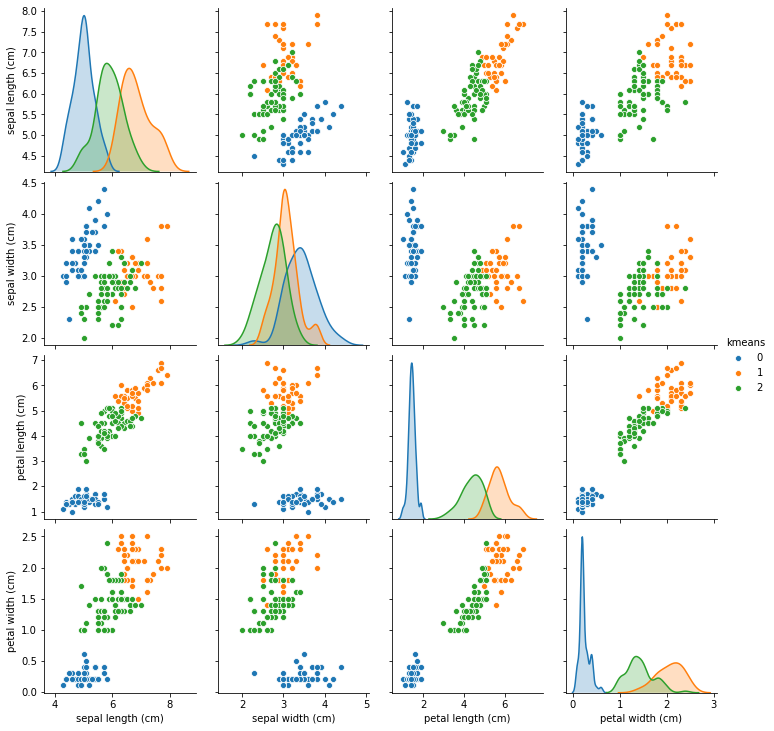

In [29]:
import seaborn as sns

sns.pairplot(data.iloc[:,[0,1,2,3,-1]], hue='kmeans')

In [32]:
confusion_matrix(data.target,data.kmeans)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

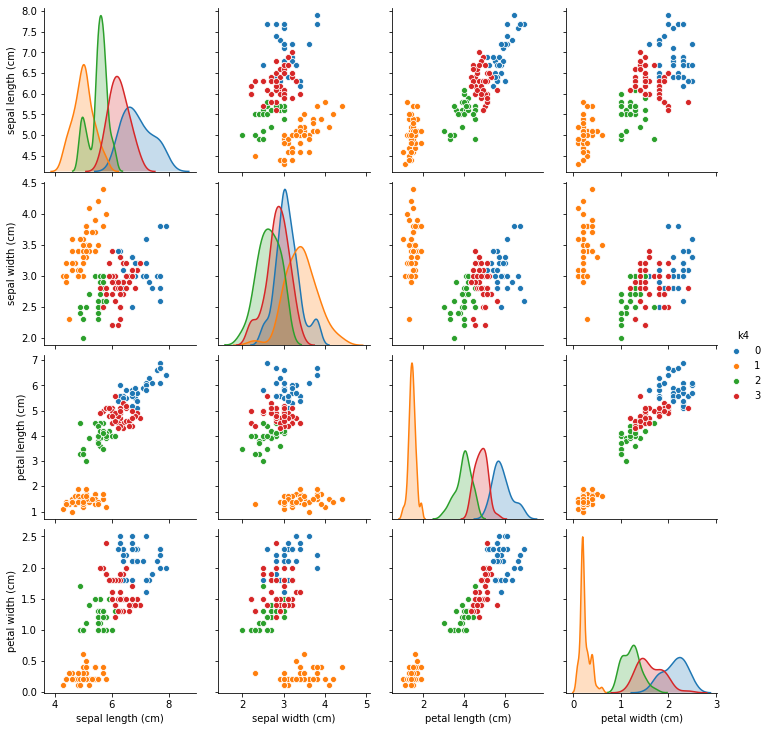

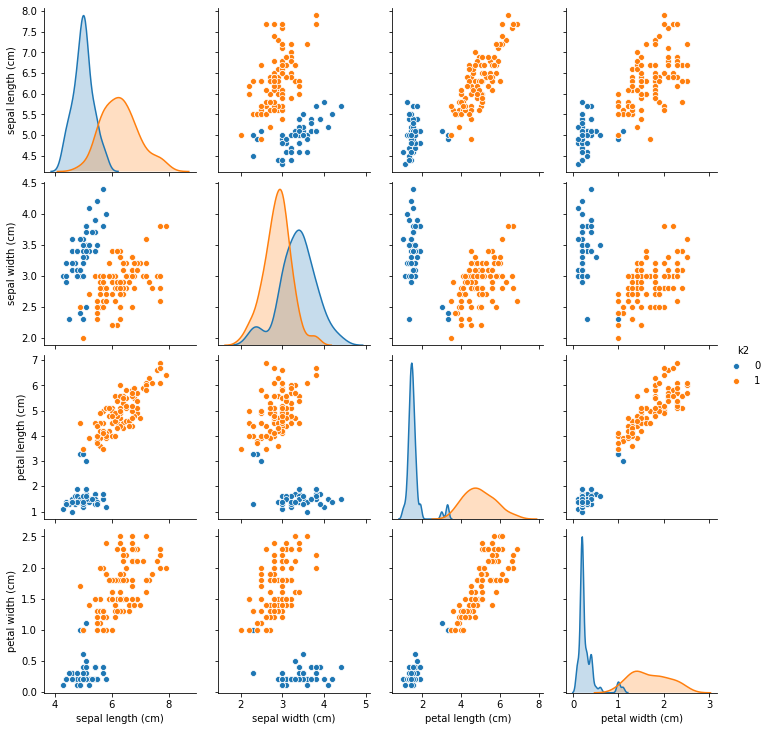

In [35]:
k2 = KMeans(n_clusters=2)
k2.fit(X)

data['k2'] = k2.labels_
sns.pairplot(data.iloc[:,[0,1,2,3,-1]], hue='k2')

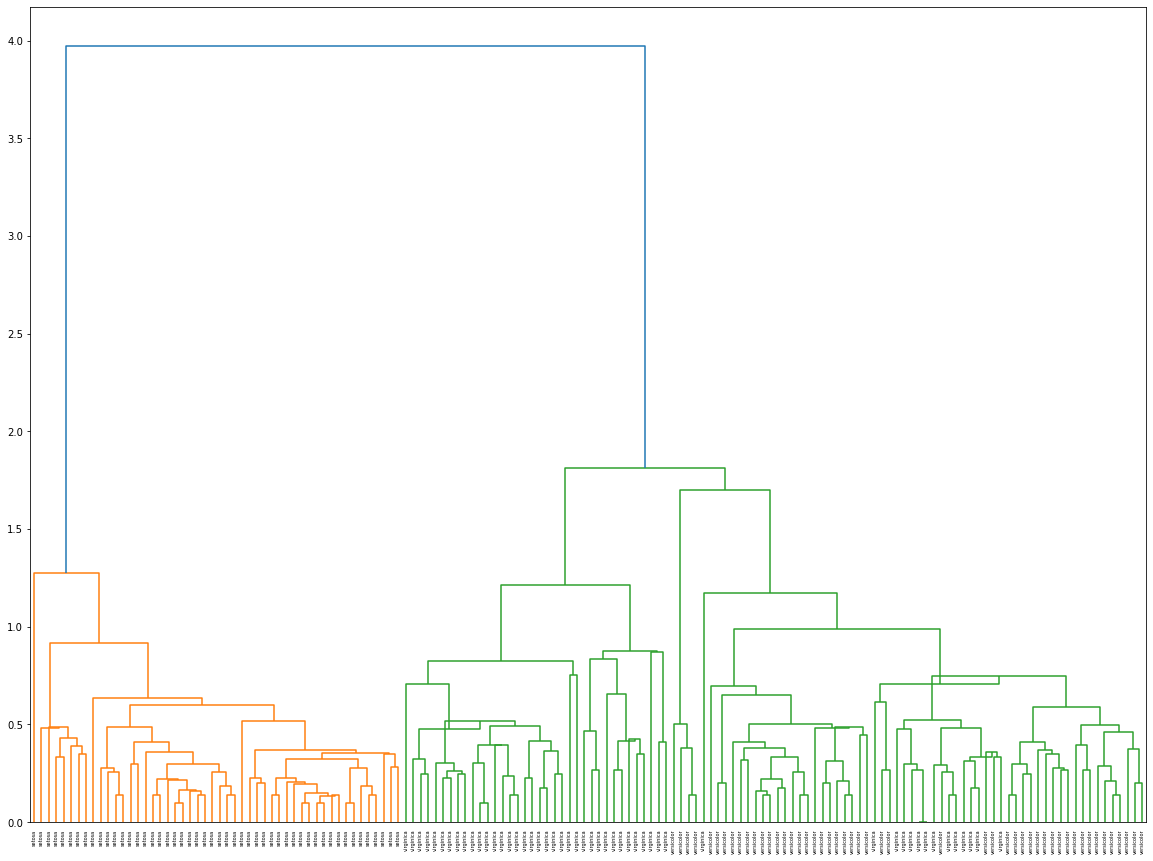

In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram

lk = linkage(X, method='centroid')

plt.subplots(figsize=(20,15))
dendrogram(lk, labels=list(pd.Series(Y).map({0:'setosa',1:'versicolor',2:'virginica'})))

import matplotlib.pyplot as plt
plt.show()

In [55]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [54]:
data_baru = data.iloc[:,:5]

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df = pd.DataFrame(pca.fit_transform(X), columns = ['var 1', 'var 2'])

df

,var 1,var 2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


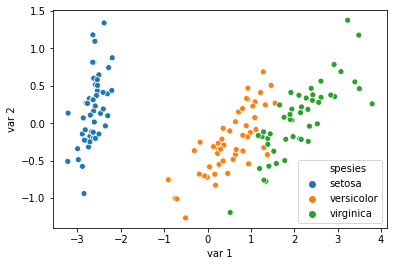

In [66]:
df['spesies'] = data.target.map({0:'setosa', 1:'versicolor', 2:'virginica'})
sns.scatterplot(data=df, x='var 1', y='var 2', hue='spesies')

In [65]:
df

,var 1,var 2,spesies
0,-2.684126,0.319397,0.0
1,-2.714142,-0.177001,0.0
2,-2.888991,-0.144949,0.0
3,-2.745343,-0.318299,0.0
4,-2.728717,0.326755,0.0
...,...,...,...
145,1.944110,0.187532,2.0
146,1.527167,-0.375317,2.0
147,1.764346,0.078859,2.0
148,1.900942,0.116628,2.0
